In [1]:
'''
Датасет - https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
Предметная область - медицинские исследования сердечных заболеваний среди людей 40-65 лет
Источник данных - медицинские обследования
Тип данных - реальные
Основная задача анализа - выявление наличия сердечных заболеваний на основании некоторых параметров

Атрибуты датасета:

Возраст - число в днях
Пол - число; где 1 женщина, а 2 мужчина
Рост - число в сантиметрах
Вес - число в килограмах
Систолическое давление - число в ммрт
Диастолическое давление - число в ммрт
Холестерин - число; 1: в норме, 2: выше нормы, 3: значительно выше нормы
Глюкоза - число; 1: в норме, 2: выше нормы, 3: значительно выше нормы
Курение - двоичное число, 0: не курит, 1: курит
Употребление алкоголя - двоичное число, 0: не употребляет алкоголь, 1: употребляет алкоголь
Физическая активность - двоичное число, 0: не занимается спортом, 1: занимается спортом
Наличие сердечных заболеваний - двоичное число, 0: не имеет сердечных заболеваний, 1: имеет сердечные заболевания
'''

'\nДатасет - https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset\nПредметная область - медицинские исследования сердечных заболеваний среди людей 40-65 лет\nИсточник данных - медицинские обследования\nТип данных - реальные\nОсновная задача анализа - выявление наличия сердечных заболеваний на основании некоторых параметров\n\nАтрибуты датасета:\n\nВозраст - число в днях\nПол - число; где 1 женщина, а 2 мужчина\nРост - число в сантиметрах\nВес - число в килограмах\nСистолическое давление - число в ммрт\nДиастолическое давление - число в ммрт\nХолестерин - число; 1: в норме, 2: выше нормы, 3: значительно выше нормы\nГлюкоза - число; 1: в норме, 2: выше нормы, 3: значительно выше нормы\nКурение - двоичное число, 0: не курит, 1: курит\nУпотребление алкоголя - двоичное число, 0: не употребляет алкоголь, 1: употребляет алкоголь\nФизическая активность - двоичное число, 0: не занимается спортом, 1: занимается спортом\nНаличие сердечных заболеваний - двоичное число, 0: не им

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

names = ['ID', 'Age', 'Gender', 'Height', 'Weight',
        'Systolic BP', 'Diastolic BP', 'Cholesterol', 'Glucose',
         'Smoking', 'Alcohol intake', 'Physical activity', 'Disease']

csv = pd.read_csv('cardio.csv', sep=';')
csv.columns = names
DF = pd.DataFrame(csv)
DF = DF.iloc[:, 1:]
DF['Age']//=365.25 # Перевод возраста из дней в года

In [3]:
print('Средние значения каждого столбца:\n', DF.mean())

Средние значения каждого столбца:
 Age                   52.803257
Gender                 1.349571
Height               164.359229
Weight                74.205690
Systolic BP          128.817286
Diastolic BP          96.630414
Cholesterol            1.366871
Glucose                1.226457
Smoking                0.088129
Alcohol intake         0.053771
Physical activity      0.803729
Disease                0.499700
dtype: float64


In [4]:
print('Среднеквадратическое отклонение каждого столбца:\n', DF.std())

Среднеквадратическое отклонение каждого столбца:
 Age                    6.762462
Gender                 0.476838
Height                 8.210126
Weight                14.395757
Systolic BP          154.011419
Diastolic BP         188.472530
Cholesterol            0.680250
Glucose                0.572270
Smoking                0.283484
Alcohol intake         0.225568
Physical activity      0.397179
Disease                0.500003
dtype: float64


In [5]:
# Некоторые столбцы датасета содержат неадекватные значения (давление 1000, возраст значительно менее 40 лет)
# Нет смысла каким либо образом обрабатывать эти значения, проще их просто удалить, ибо на 70000 строках это отразтся минимально
# Для каждого параметра небходимо опытным путем высчитать значение threshold

# Принимает два столбца и удаляет строки с выбросами на основании первого столбца
# Границы допустимых значений основываются на параметре threshold
def remove_outliers(data, threshold = 3): 
    col = data.iloc[:, 0] # Первый столбец
    mean = np.mean(col) # Среднее значение
    std = np.std(col) # СКО
    lower_bound = mean - threshold * std #Верхняя и нижняя граница допустимых значений
    upper_bound = mean + threshold * std
    cleaned_data = data[(col >= lower_bound) & (col <= upper_bound)] # Столбцы с удаленными строками
    num_outliers = len(data) - len(cleaned_data) # Число удаленных элементов
    if num_outliers > 0:
        print(f"Из столбца {data.columns[0]} удалено {num_outliers} выбросов\n")
    return cleaned_data

In [6]:
# Принимает два столбца, выводит их корреляцию и график зависимости
def correlation(data):
    plt.figure(figsize=(14,7))
    col_0 = data.columns[0]
    col_1 = data.columns[1]
    print(f"Коэффициент корреляции между {col_0} и вероятностью болезни сердца = {np.corrcoef(data[col_0], data[col_1])[0,1]:.{4}f}")
    data = data.groupby(col_0).mean().reset_index() #Группировка значений по первому столбцу
    data = data[(data[col_1] != 1) & (data[col_1] != 0)] # Удаление значений с 0 и 1, ибо такие значения не имеют смысла
    plt.bar(data[col_0], data[col_1]) # Вывод графика
    dy = (data[col_1]).mean()/20
    plt.ylim(min(data[col_1]) - dy, max(data[col_1]) + dy) # Установка границ по Y
    plt.xlabel(col_0)
    plt.ylabel('Вероятность заболевания')

Возраст

Из столбца Age удалено 4 выбросов

Коэффициент корреляции между Age и вероятностью болезни сердца = 0.2378


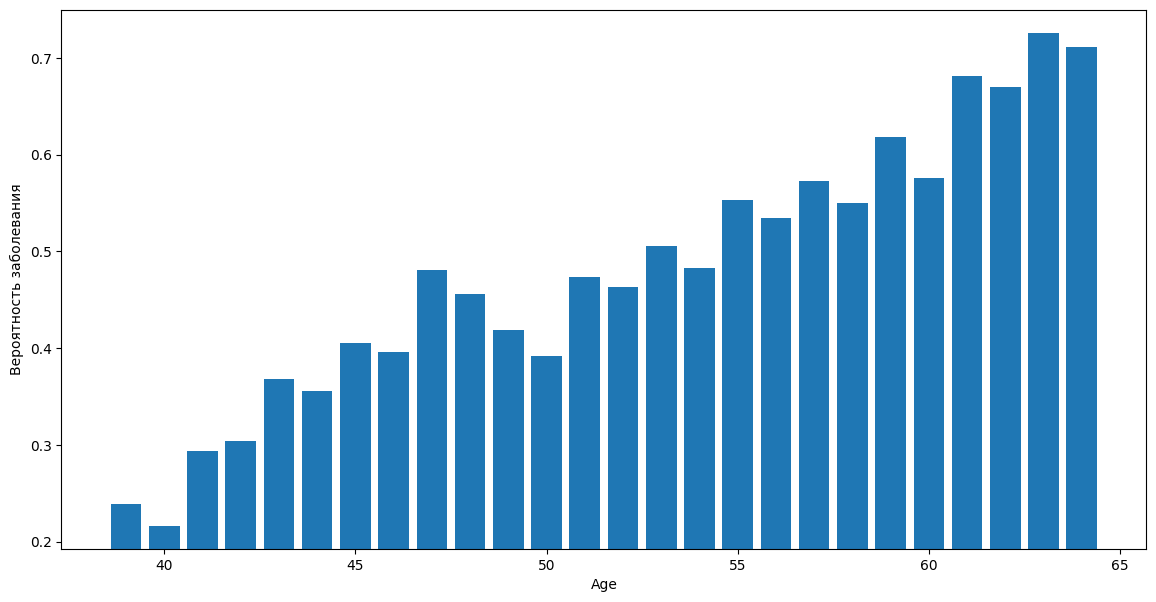

In [7]:
print("Возраст\n")
correlation(remove_outliers(DF[['Age', 'Disease']]))

# Как видно из графика между возрастом и шансом сердечного заболевания довольно сильная корреляционная зависимость

Пол

Коэффициент корреляции между Gender и вероятностью болезни сердца = 0.0081


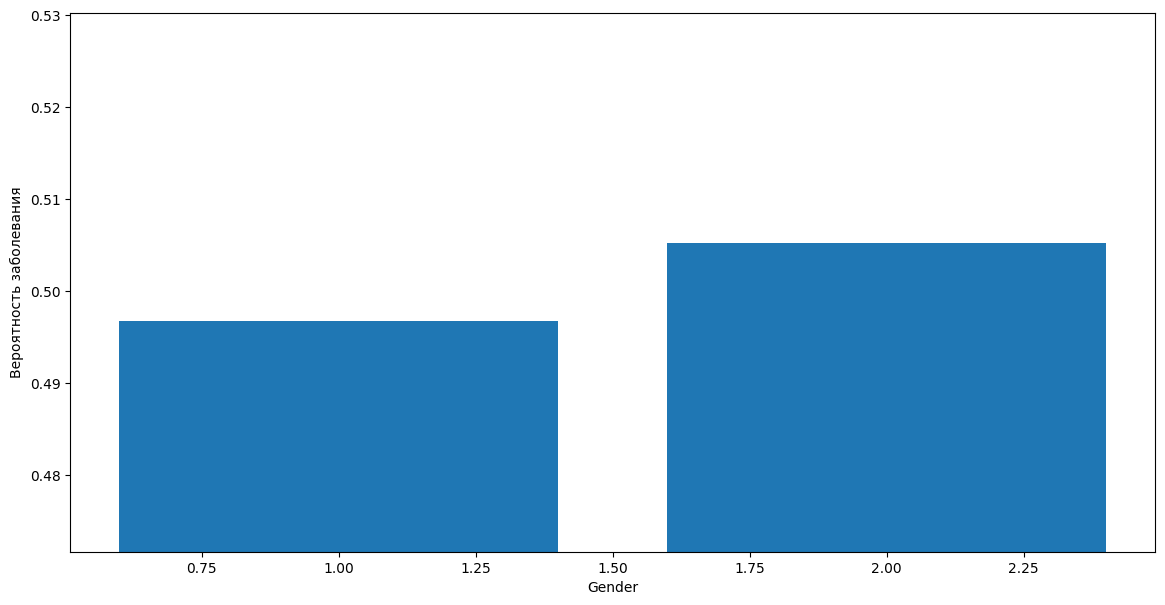

In [8]:
print("Пол\n")
correlation(DF[['Gender', 'Disease']])

# Исходня из полученных данных видно, что вероятность сердечных заболеваний у мужчин совсем немного выше, чем у женщин

Рост

Из столбца Height удалено 293 выбросов

Коэффициент корреляции между Height и вероятностью болезни сердца = -0.0135


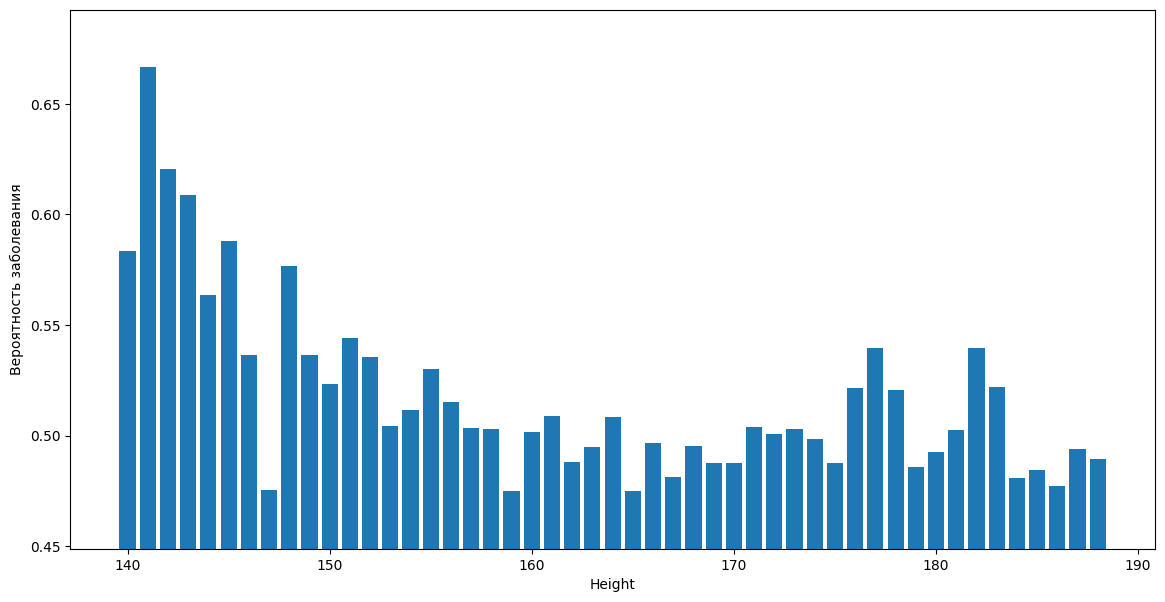

In [9]:
print("Рост\n")
correlation(remove_outliers(DF[['Height', 'Disease']]))

# Между ростом и шансом сердечного заболевания практически нет коорреляции,
# разве что люди с ростом менее 150 см имеют склонность к болезни

Вес

Из столбца Weight удалено 2 выбросов

Коэффициент корреляции между Weight и вероятностью болезни сердца = 0.1819


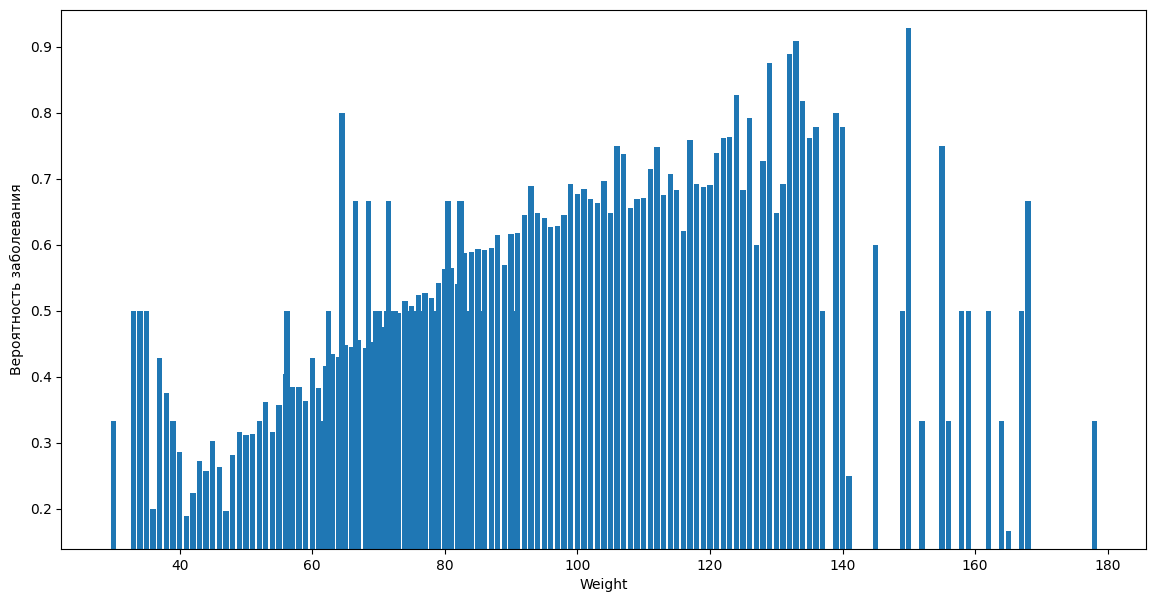

In [10]:
print("Вес\n")
correlation(remove_outliers(DF[['Weight', 'Disease']], 8))

# При очень никзом и высоком показателя веса шанс сердечных заболеваний увеличивается

Систолическое давление 

Из столбца Systolic BP удалено 409 выбросов

Коэффициент корреляции между Systolic BP и вероятностью болезни сердца = 0.4331


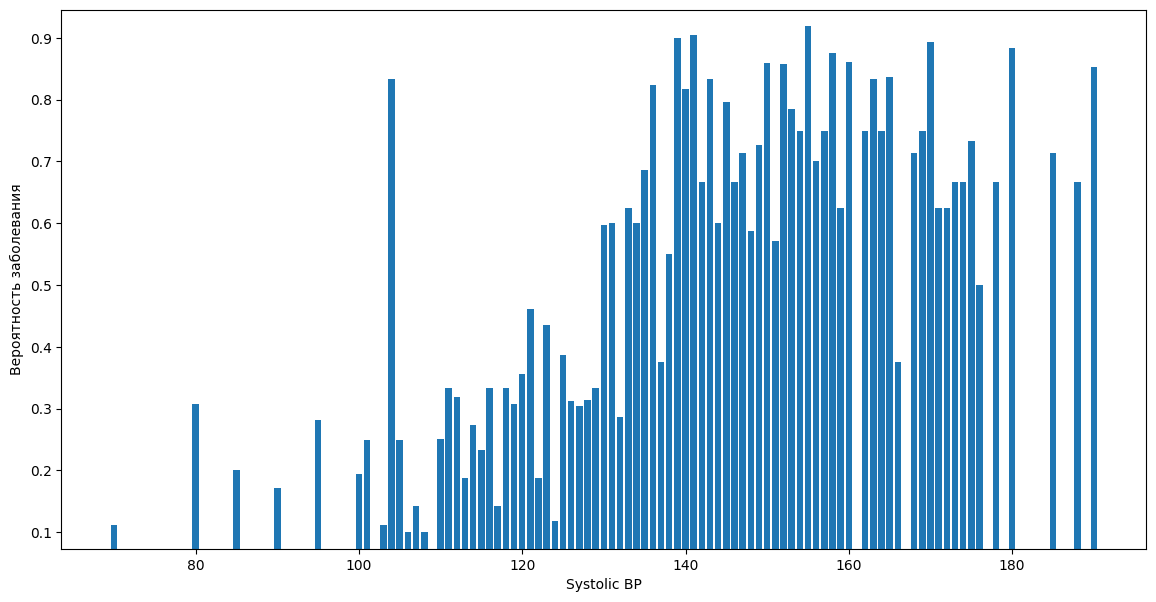

In [11]:
print("Систолическое давление \n")
correlation(remove_outliers(DF[['Systolic BP', 'Disease']], 0.4))

# Высокое систолическое давление давление один из самых явных показателей сердечных заболеваний

Диастолическое давление

Из столбца Diastolic BP удалено 1013 выбросов

Коэффициент корреляции между Diastolic BP и вероятностью болезни сердца = 0.3354


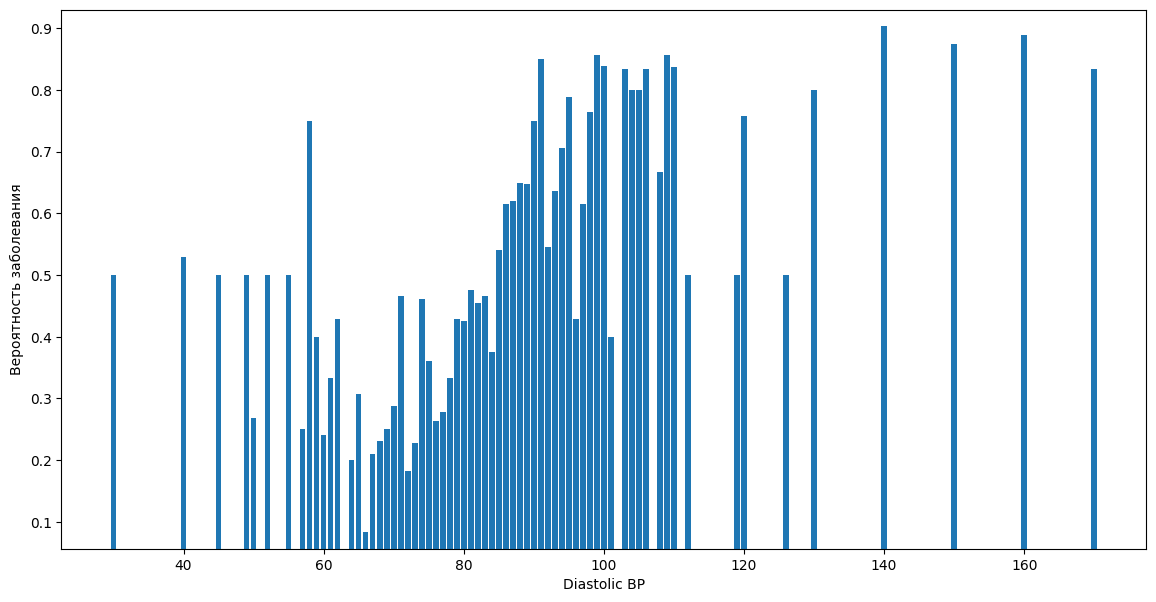

In [12]:
print("Диастолическое давление\n")
correlation(remove_outliers(DF[['Diastolic BP', 'Disease']], 0.4))

# Диастолическое давление не так высоко коррелировано, как систолическое, но все равно сильно влияет на сердечные заболевания

Холестерин

Коэффициент корреляции между Cholesterol и вероятностью болезни сердца = 0.2211


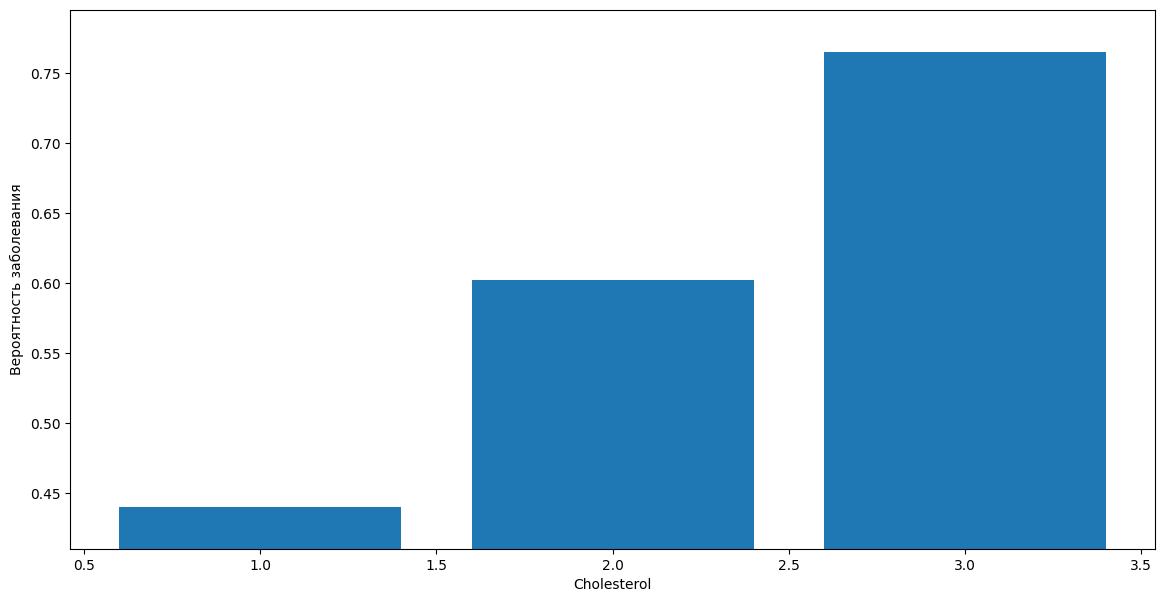

In [13]:
print("Холестерин\n")
correlation(DF[['Cholesterol', 'Disease']])

# Повышенный холестерин негативно сказывается на здоровье сердца

Глюкоза

Коэффициент корреляции между Glucose и вероятностью болезни сердца = 0.0893


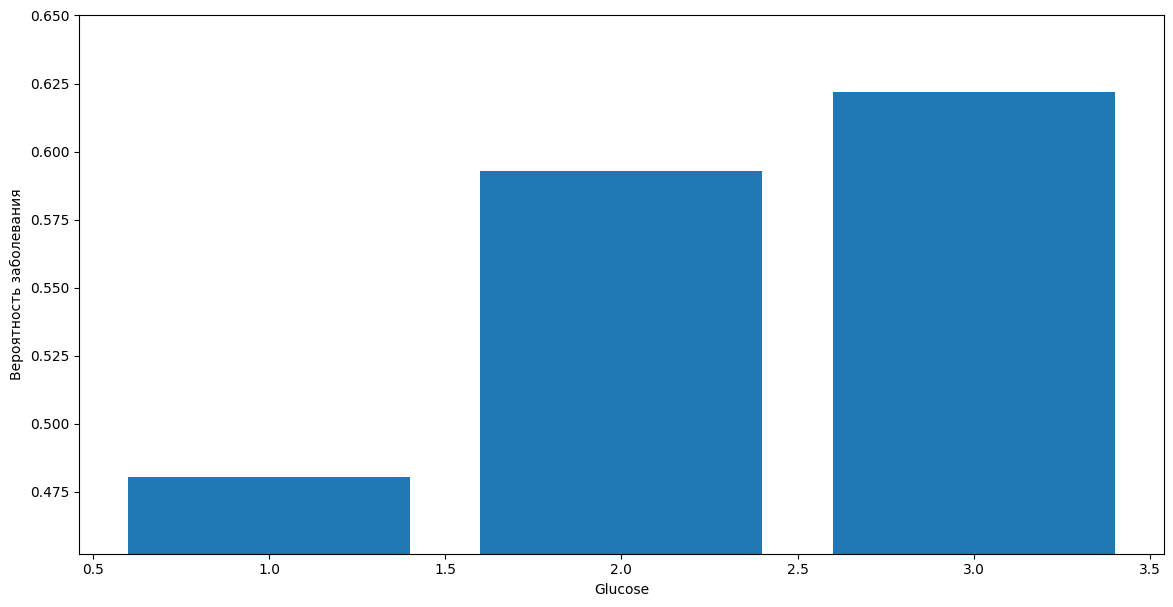

In [14]:
print("Глюкоза\n")
correlation(DF[['Glucose', 'Disease']])

# Также как и холестерин, глюкоза негативно сказывается на здоровье сердца, но в меньшей степени

Курение

Коэффициент корреляции между Smoking и вероятностью болезни сердца = -0.0155


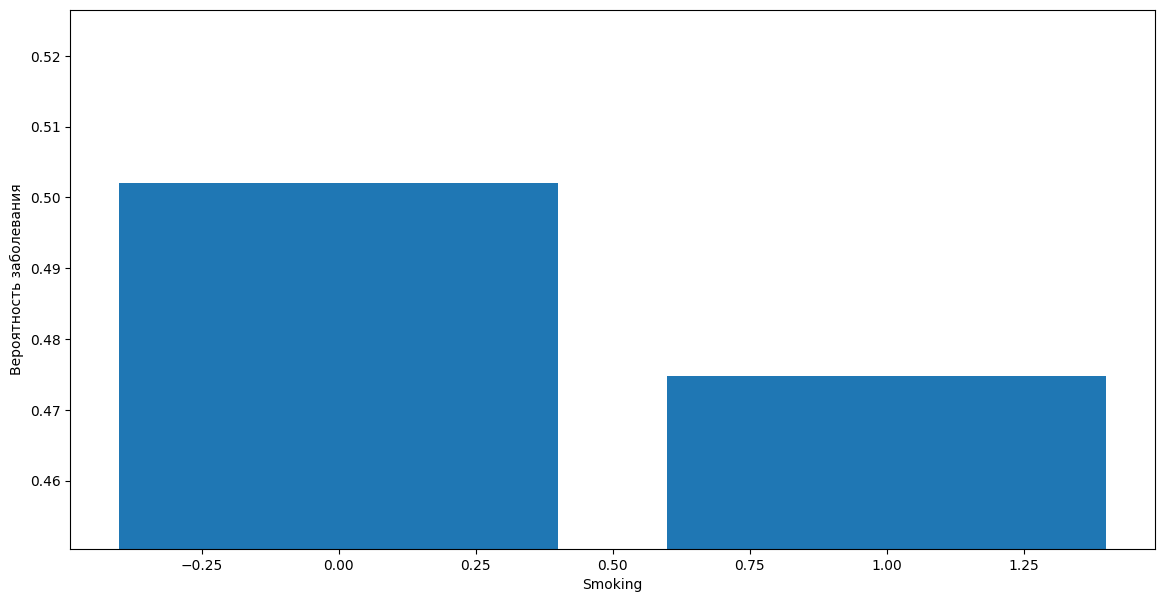

In [15]:
print("Курение\n")
correlation(DF[['Smoking', 'Disease']])

# Исходя из полученных данных можно сделать вывод, что курение не влияет на болезни сердца

Употребление алкоголя

Коэффициент корреляции между Alcohol intake и вероятностью болезни сердца = -0.0073


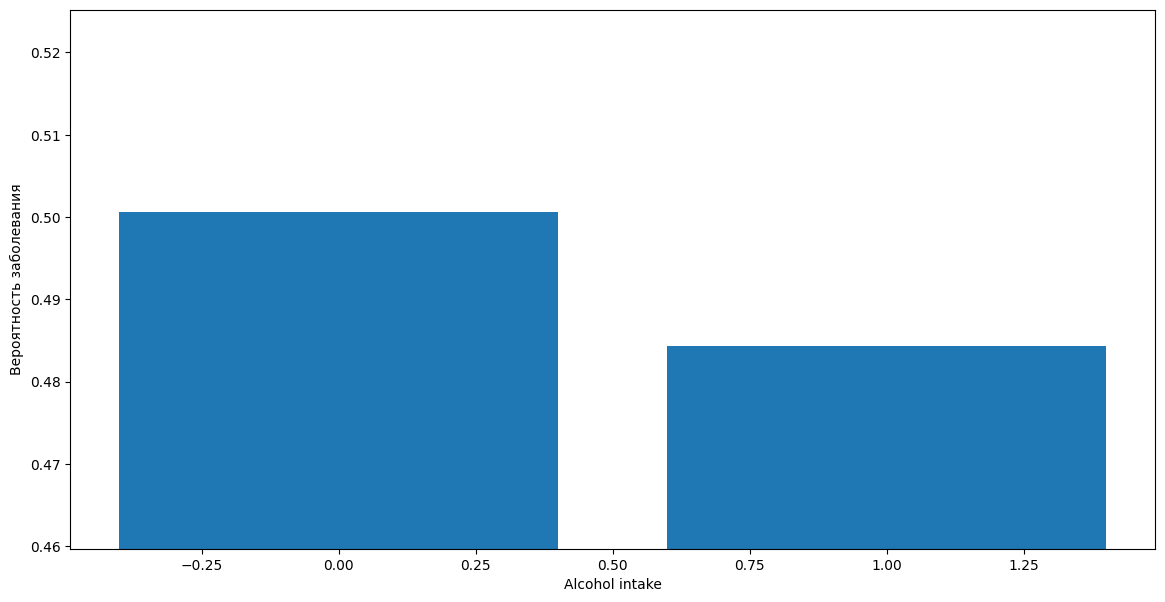

In [16]:
print("Употребление алкоголя\n")
correlation(DF[['Alcohol intake', 'Disease']])

# Исходя из полученных данных можно сделать вывод, что употребление алкоголя не влияет на болезни сердца

Физическая активность

Коэффициент корреляции между Physical activity и вероятностью болезни сердца = -0.0357


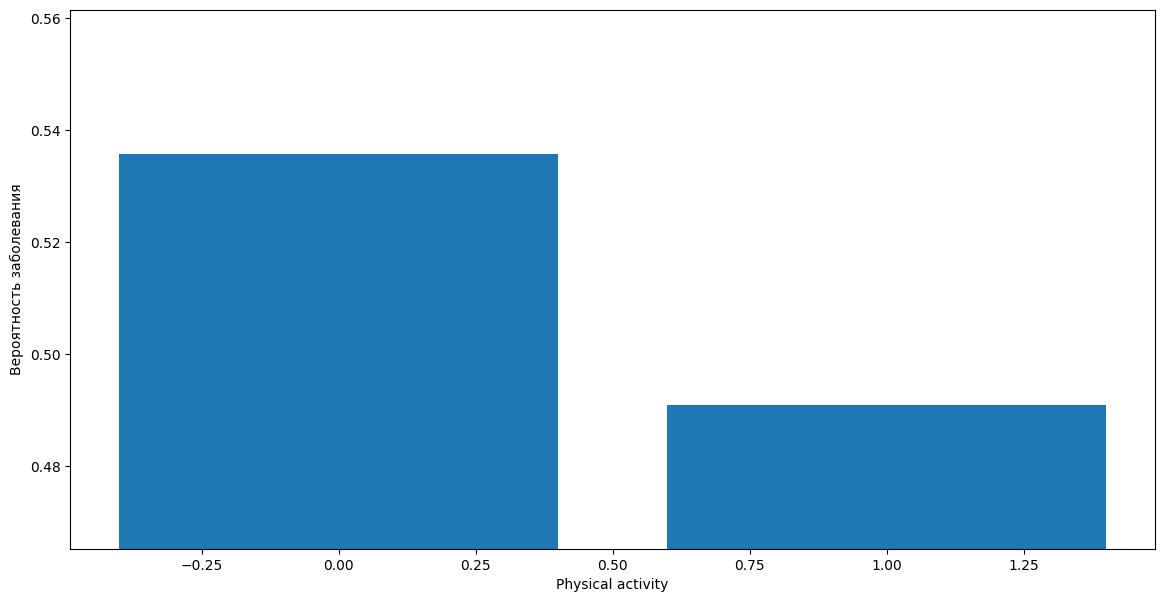

In [17]:
print("Физическая активность\n")
correlation(DF[['Physical activity', 'Disease']])

# Как ни странно физическая активность негативно сказывается на здоровье сердца,
# но это легко объясняется тем, что возраст испытуемых варируется от 40 до 65 лет

In [18]:
'''
Для корреляции некоторых параметров при помощи функции remove_outliers были удалены строчки с некорректными данными
Для вывода коэффициента корреляции и графика зависимости использована функция correlation

Наиболее коррелированые параметры:

Систолическое давление
Диастолическое давление
Возраст
Холестерин

Наименее коррелированые параметры:

Употребление алкоголя
Пол
Рост
Курение
'''

'\nДля корреляции некоторых параметров при помощи функции remove_outliers были удалены строчки с некорректными данными\nДля вывода коэффициента корреляции и графика зависимости использована функция correlation\n\nНаиболее коррелированые параметры:\n\nСистолическое давление\nДиастолическое давление\nВозраст\nХолестерин\n\nНаименее коррелированые параметры:\n\nУпотребление алкоголя\nПол\nРост\nКурение\n'